# EDA

In [2]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
tqdm.pandas()

In [3]:
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_dark"
py.init_notebook_mode(connected=True)

In [4]:
DATA_DIR = 'data'
LABEL_DIR = 'label2.csv'
IMAGE_DIR = os.path.join(DATA_DIR, 'DaanForestPark')

In [5]:
label_df = pd.read_csv(LABEL_DIR)
label_df.head()

dirpath target  label
0  DaanForestPark/20180330/1lZsRrQzj    通泉草     66
1  DaanForestPark/20180330/4PdXwYcGt  紫花酢漿草     51
2  DaanForestPark/20180330/6VrmeiUE5    通泉草     66
3  DaanForestPark/20180330/7nrSoiuHL    通泉草     66
4  DaanForestPark/20180330/7RKdkJLgy    通泉草     66

In [6]:
SAMPLE_LEN = 300

## DaanForestPark Dataset

### Exploring

In [7]:
_images, _labels, _name = [], [], []
# Reading the categorical file
label_df = pd.read_csv(LABEL_DIR)
# Iterate all files including .jpg inages  
for subdir, dirs, files in tqdm(os.walk(IMAGE_DIR)):
    for filename in files:
        corr_label = label_df[label_df['dirpath']==subdir[len(DATA_DIR)+1:]]
        if corr_label['label'].values.size!= 0 and filename.endswith(('jpg')):
            _images.append(subdir + os.sep + filename)
            _labels.append(corr_label['label'].values[0])
            _name.append(corr_label['target'].values[0])     

485it [00:07, 63.57it/s]


In [8]:
df = pd.DataFrame({'dir':_images, 'target':_name, 'label':_labels })
df.head()

dir target  label
0  data/DaanForestPark/20180825/0543KILCA/0543KIL...    使君子      5
1  data/DaanForestPark/20180825/0543KILCA/0543KIL...    使君子      5
2  data/DaanForestPark/20180825/0543KILCA/0543KIL...    使君子      5
3  data/DaanForestPark/20180825/0543KILCA/0543KIL...    使君子      5
4  data/DaanForestPark/20180825/0543KILCA/0543KIL...    使君子      5

In [9]:
def load_image(image):
    image = cv2.imread(image)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [10]:
train_images = df['dir'][:SAMPLE_LEN].progress_apply(load_image)

100%|██████████| 300/300 [00:03<00:00, 91.03it/s]


#### Visualize one shot

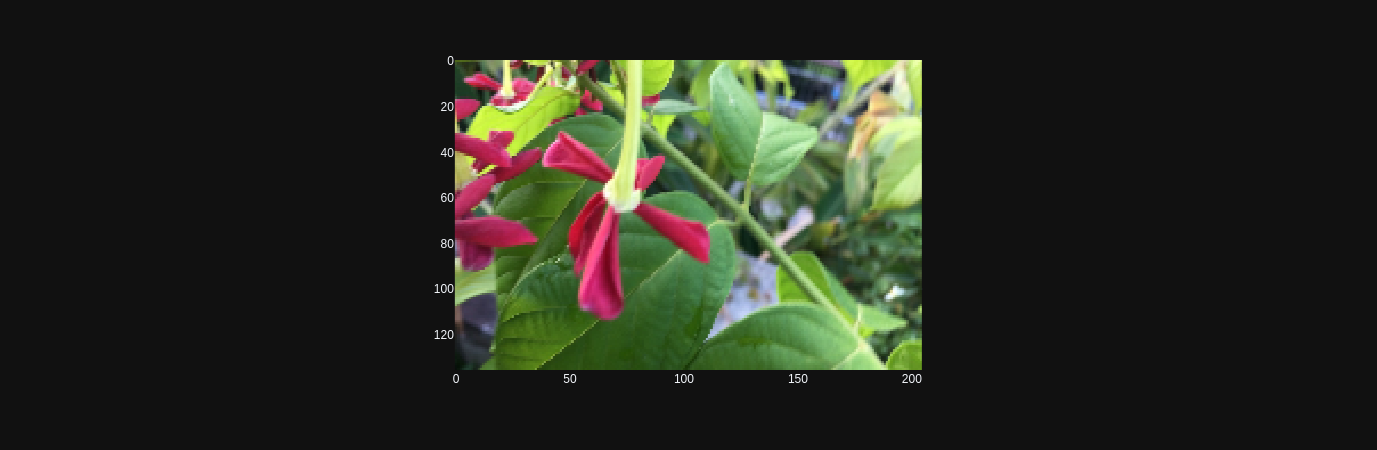

In [11]:
fig = px.imshow(cv2.resize(train_images[0], (205, 136)))
fig.show()

In [12]:
red_values = [np.mean(train_images[idx][:, :, 0]) for idx in range(len(train_images))]
green_values = [np.mean(train_images[idx][:, :, 1]) for idx in range(len(train_images))]
blue_values = [np.mean(train_images[idx][:, :, 2]) for idx in range(len(train_images))]
values = [np.mean(train_images[idx]) for idx in range(len(train_images))]

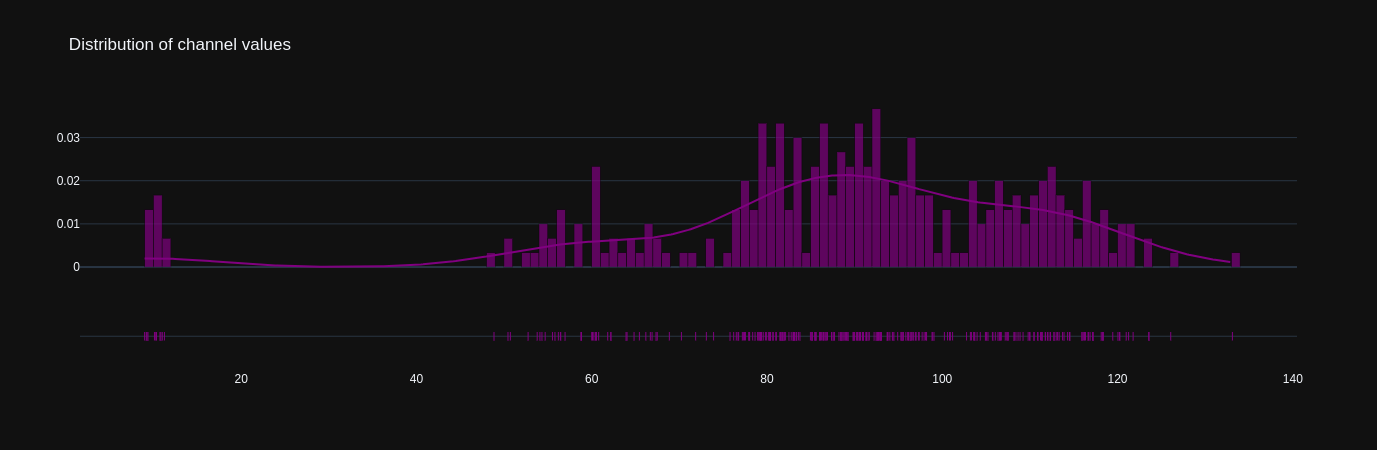

In [13]:
fig = ff.create_distplot([values], group_labels=["Channels"], colors=["purple"])
fig.update_layout(showlegend=False)
fig.update_layout(title_text="Distribution of channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

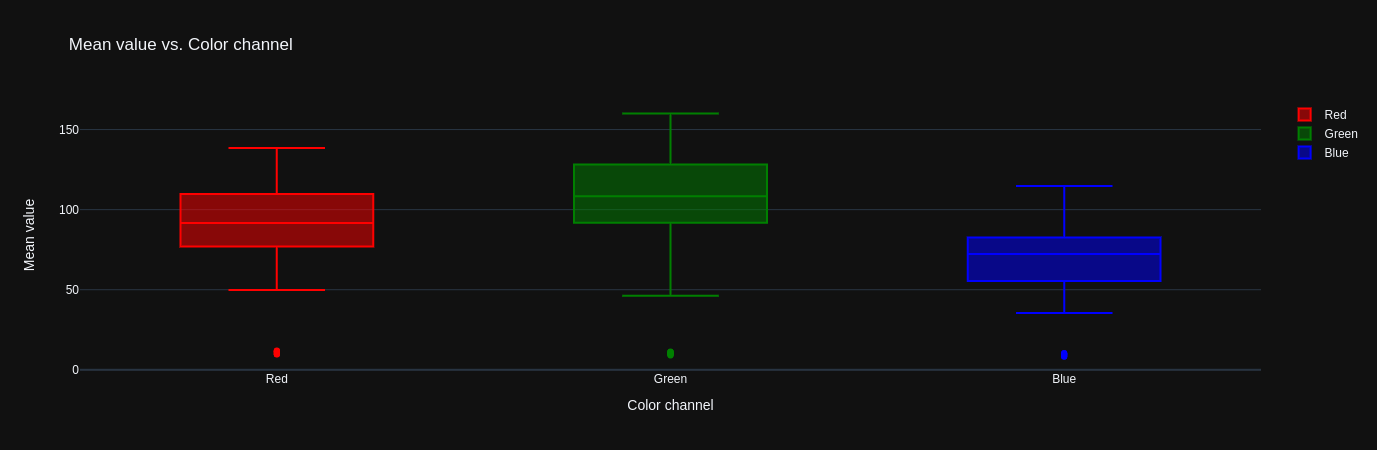

In [14]:
fig = go.Figure()

for idx, values in enumerate([red_values, green_values, blue_values]):
    if idx == 0:
        color = "Red"
    if idx == 1:
        color = "Green"
    if idx == 2:
        color = "Blue"
    fig.add_trace(go.Box(x=[color]*len(values), y=values, name=color, marker=dict(color=color.lower())))
    
fig.update_layout(yaxis_title="Mean value", xaxis_title="Color channel",
                  title="Mean value vs. Color channel")

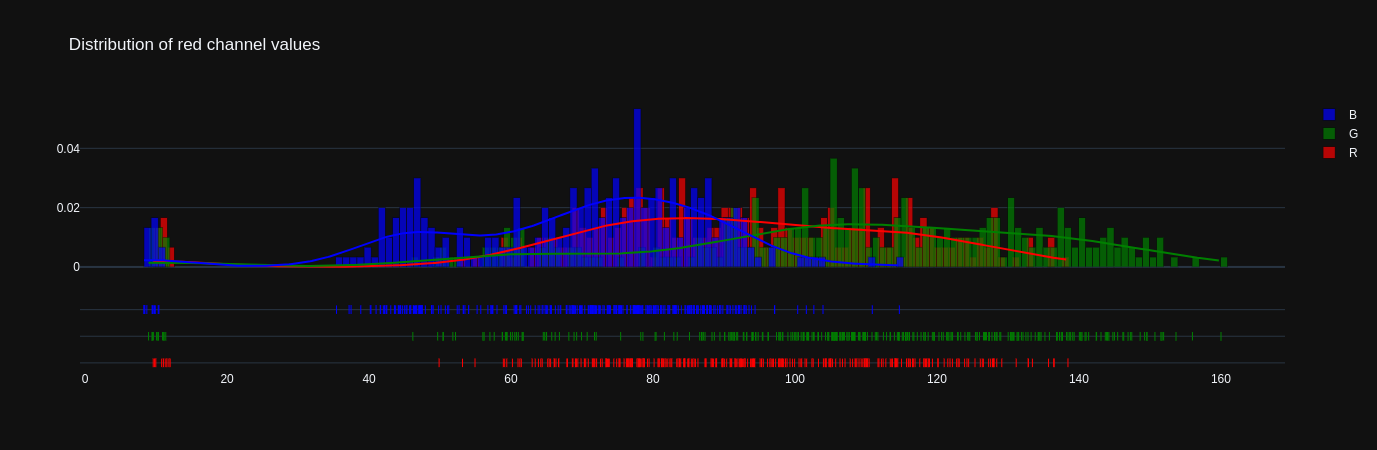

In [15]:
fig = ff.create_distplot([red_values, green_values, blue_values],
                         group_labels=["R", "G", "B"],
                         colors=["red", "green", "blue"])
fig.update_layout(title_text="Distribution of red channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [16]:
category_ind = df['label'][:SAMPLE_LEN].unique()
category = df['target'][:SAMPLE_LEN].unique()
category

array(['使君子', '瑪瑙珠', '仙丹花', '苦楮', '軟枝黃蟬', '蜘蛛百合'], dtype=object)

In [17]:
x = {i:df[df['label']==i]['dir'].iloc[0] for i in category_ind}
x

{5: 'data/DaanForestPark/20180825/0543KILCA/0543KILCA_17.jpg',
 41: 'data/DaanForestPark/20180825/0602DZIXW/0602DZIXW_5.jpg',
 4: 'data/DaanForestPark/20180825/0557PQODW/0557PQODW_7.jpg',
 57: 'data/DaanForestPark/20180825/0548PXKBT/0548PXKBT_16.jpg',
 64: 'data/DaanForestPark/20180822/0628MSTHE/0628MSTHE_7.jpg',
 62: 'data/DaanForestPark/20180822/0636HXWRR/0636HXWRR_6.jpg'}

In [18]:
proj = pd.DataFrame({'r':red_values,'g':green_values, 'b':blue_values,'target': df['target'][:SAMPLE_LEN],'label':df['label'][:SAMPLE_LEN]})

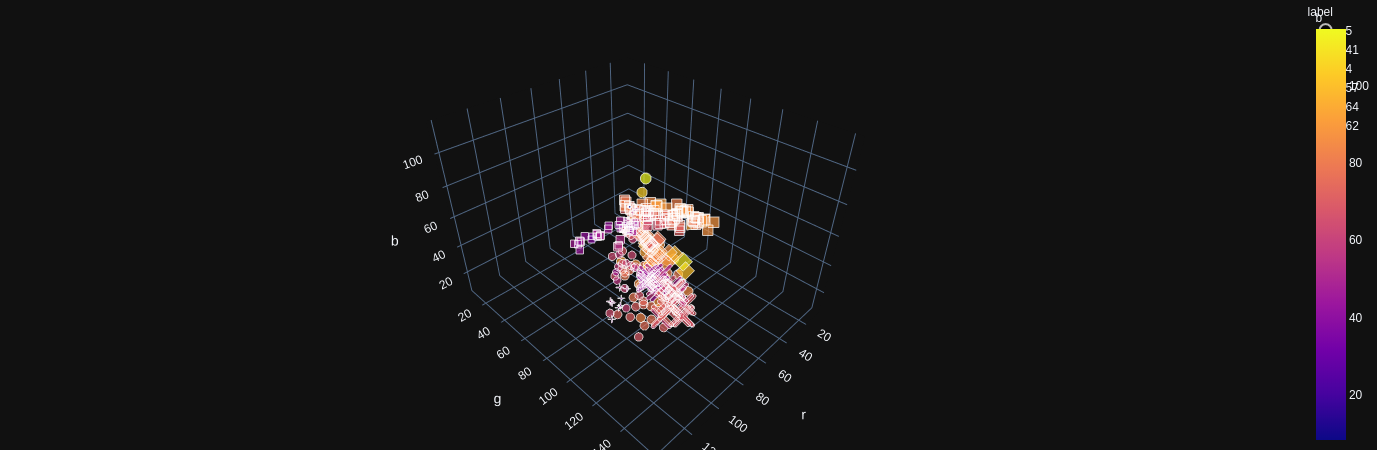

In [19]:
fig = px.scatter_3d(proj, x='r', y='g', z='b',
              color='b', size='b', size_max=18,
              symbol='label', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [125]:
category_ind

array([ 5, 41,  4, 57, 64, 62])

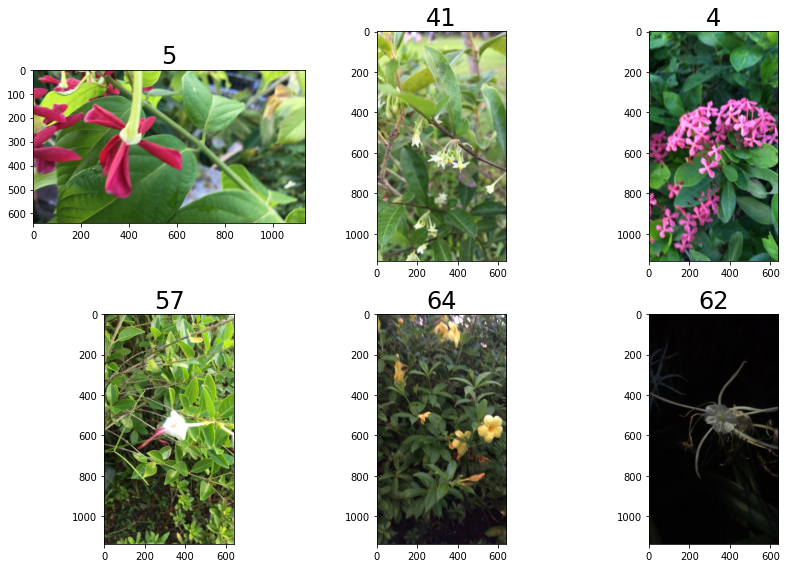

In [36]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

ax[0,0].imshow(load_image(x[5]))
ax[0,0].set_title('5', fontsize=24)

ax[0,1].imshow(load_image(x[41]))
ax[0,1].set_title('41', fontsize=24)

ax[0,2].imshow(load_image(x[4]))
ax[0,2].set_title('4', fontsize=24)

ax[1,0].imshow(load_image(x[57]))
ax[1,0].set_title('57', fontsize=24)

ax[1,1].imshow(load_image(x[64]))
ax[1,1].set_title('64', fontsize=24)

ax[1,2].imshow(load_image(x[62]))
ax[1,2].set_title('62', fontsize=24)

fig.tight_layout()
plt.show()